# Least mean squares:

Given:

$$ X = [x_0, x_1, \cdots ,x_{n-1}]^T $$

$$ Y = [y_0, y_1, \cdots ,y_{n-1}]^T $$

$$ x^0_i a_0 + x^1_i  a_1 + \cdots + x^{k-1}_i a_{k-1} + x^k_i a_k = y_i \quad \forall \quad i \in \{0, \cdots , n-1\} $$

$$
\stackrel{Q_{n \times (k+1)}}
{
\begin{bmatrix}
1 & x_0 & \cdots & x_0^k \\
1 & x_1 & \cdots & x_1^k \\
\vdots & \vdots & \ddots & \vdots  \\
1 & x_{n-1} & \cdots & x_{n-1} \\
\end{bmatrix}
}
\stackrel{A_{(k+1) \times 1}}
{
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots  \\
a_k \\
\end{bmatrix}
}
\approx
\stackrel{Y_{n \times 1}}
{
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots  \\
y_k \\
\end{bmatrix}
}
$$

$$ Q A \approx Y $$

$$ \underset{A}{\min} ||Q A - Y||^2_2 $$

$$ A = (Q^TQ)^{-1}Q^TY $$

In [40]:
x = sp.IndexedBase("x", real=True)
import sympy as sp
n = 4
k = 1
X = sp.MatrixSymbol("x", n, 1)
Y = sp.MatrixSymbol("y", n, 1)
A = sp.MatrixSymbol("a", k + 1, 1)
Q = sp.zeros(n, k + 1)
for l in range(n):
    for c in range(k + 1):
        Q[l, c] = x[l]**c

sp.Eq(Q * A.as_explicit(), Y.as_explicit())

Eq(Matrix([
[x[0]*a[1, 0] + a[0, 0]],
[x[1]*a[1, 0] + a[0, 0]],
[x[2]*a[1, 0] + a[0, 0]],
[x[3]*a[1, 0] + a[0, 0]]]), Matrix([
[y[0, 0]],
[y[1, 0]],
[y[2, 0]],
[y[3, 0]]]))

In [46]:
e = ( (Y - Q @ A).T @ (Y - Q @ A) ).as_explicit()
e

Matrix([[(-x[0]*a[1, 0] - a[0, 0] + y[0, 0])**2 + (-x[1]*a[1, 0] - a[0, 0] + y[1, 0])**2 + (-x[2]*a[1, 0] - a[0, 0] + y[2, 0])**2 + (-x[3]*a[1, 0] - a[0, 0] + y[3, 0])**2]])

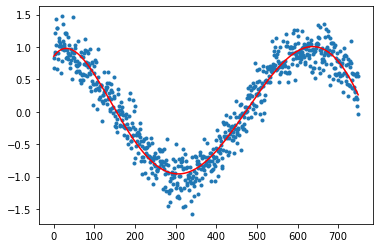

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 750
k = 5
X = np.arange(n)
Y = np.cos(X/100) + np.random.randn(n)/5

plt.plot(X, Y, ".")

Q = np.zeros((n, k + 1))

for i in range(n):
  for j in range(k + 1):
    Q[i, j] = i**j

A = np.linalg.inv(Q.T @ Q) @ Q.T @ Y
Y_fitted = np.zeros((n))

for i in range(n):
  for j in range(k + 1):
    Y_fitted[i] += A[j] * i**j

plt.plot(X, Y_fitted, "r")
plt.show()